In [4269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [4270]:
pd.set_option("display.max_rows", 4000)
pd.set_option("display.max_columns", 500)

# Reading and Understanding the Data

In [4271]:
data=pd.read_csv("day (1).csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4272]:
data.shape

(730, 16)

In [4273]:
print(data.info('all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [4274]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4275]:
data.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [4276]:
data.isnull().median()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [4277]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4278]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4279]:
data['season']=data.season.map({1:'Spring', 2:'Summer', 3:'Autumn', 4:'Winter'})

data['mnth']=data.mnth.map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 
                           9:'September', 10:'October', 11:'November', 12:'December'})

data['weekday']=data.weekday.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 
                                   6:'Saturday'})

data['weathersit']=data.weathersit.map({1:"Clear",2:"Mist",3:"LightSnow",
                                        4:'SnowFog'})
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Removing redundant and unwanted columns

In [4280]:
# casual+registered = cnt. cnt is our target variable so we will not consider casual and registered 
data.drop(['casual','registered'], axis=1, inplace=True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [4281]:
# instant is an index column so we drop it
data.drop(['instant'], axis=1, inplace=True)
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [4282]:
data.drop(['dteday'], axis=1, inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [4283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Data Visualisation

In [4284]:
data.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

In [4285]:
# Changing  datatypes of numerical columns to appropriate types 
data[['temp', 'atemp','hum','windspeed','cnt']]=data[['temp', 'atemp','hum','windspeed','cnt']].apply(pd.to_numeric)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Numerical Type:
- Temp
- Atemp
- Humidity
- Windspeed
- Count

#  Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

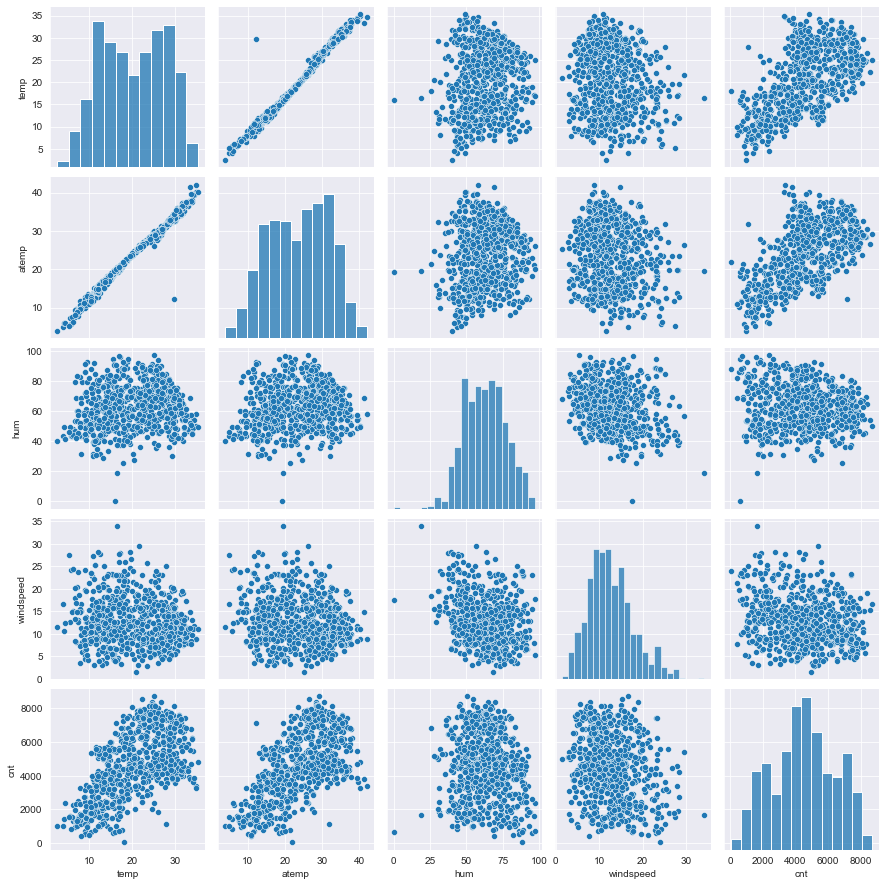

In [4286]:
# Pairplots to understand numerical variables
sns.pairplot(data, vars=['temp', 'atemp','hum','windspeed','cnt'])
plt.show()

# Categorical Types: 
   - Season
   - Month
   - Weekday
   - Weathersit

# Visualising Categorical Variable
As you might have noticed, there are a few categorical variables as well. Let's make a barplot for some of these variables.

<AxesSubplot:title={'center':'Weathersit Average Count'}, xlabel='weathersit', ylabel='cnt'>

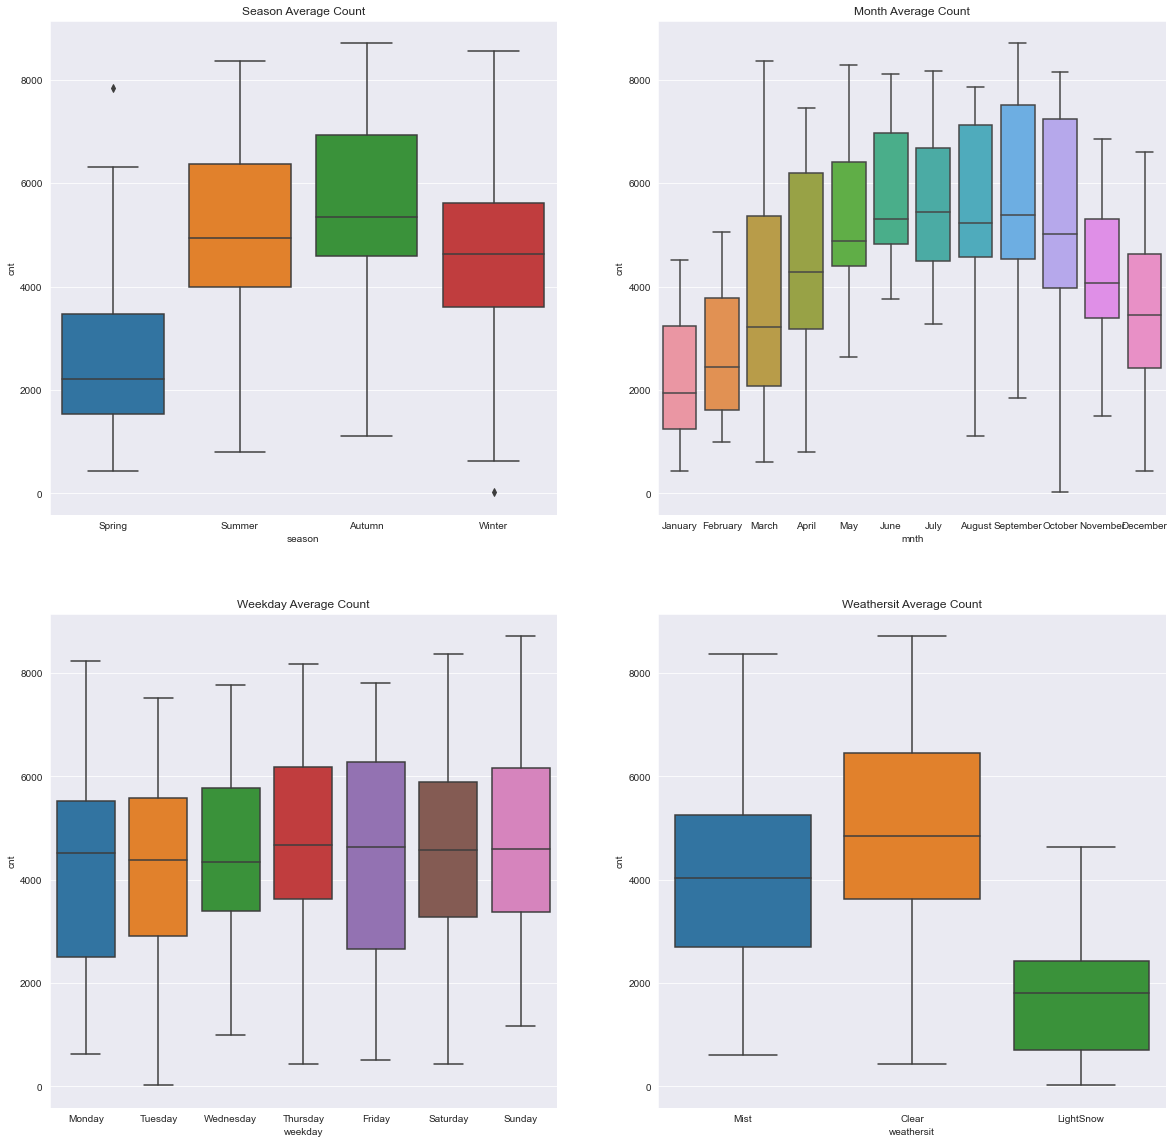

In [4287]:
# Visualising Cateorical Variables

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.title("Season Average Count")
sns.boxplot(data=data, x='season', y='cnt')

plt.subplot(2,2,2)
plt.title("Month Average Count")
sns.boxplot(data=data, x='mnth',y='cnt')

plt.subplot(2,2,3)
plt.title("Weekday Average Count")
sns.boxplot(data=data, x='weekday',y='cnt')

plt.subplot(2,2,4)
plt.title("Weathersit Average Count")
sns.boxplot(data=data, x='weathersit',y='cnt')

# Binary Type:
- Year
- Holiday
- Workingday

# Visualis Binary Variable


<AxesSubplot:title={'center':'Workingday Average Count'}, xlabel='workingday', ylabel='cnt'>

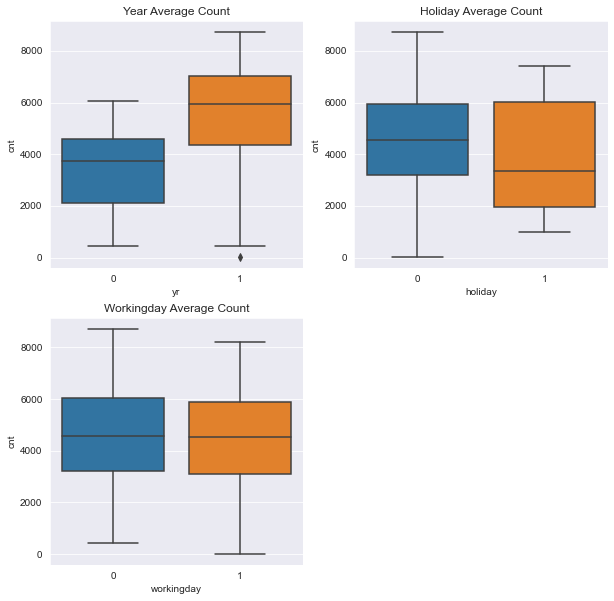

In [4288]:
# Visualising Binary Variables

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Year Average Count")
sns.boxplot(data=data, x='yr',y='cnt')

plt.subplot(2,2,2)
plt.title("Holiday Average Count")
sns.boxplot(data=data, x='holiday',y='cnt')

plt.subplot(2,2,3)
plt.title("Workingday Average Count")
sns.boxplot(data=data, x='workingday',y='cnt')

#  Draw Heatmap of correlation between variables

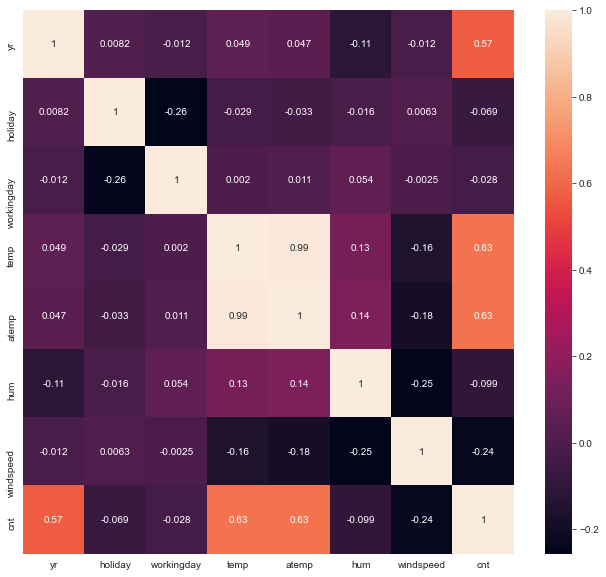

In [4289]:
# temp and atemp have a relationship
# Check the Correlation
# Heatmap
plt.figure(figsize=(11,10))
sns.heatmap(data.corr(method='pearson'),annot=True)
plt.show()

# Data Preparation

#  Dummy Variables Creation

In [4290]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [4291]:
# creating dummy variables for the variables of season, month, weekday, weathersit
Season = pd.get_dummies(data['season'],drop_first=True)
Month = pd.get_dummies(data['mnth'],drop_first=True)
Weekday = pd.get_dummies(data['weekday'],drop_first=True)
Weathersit = pd.get_dummies(data['weathersit'],drop_first=True)

In [4292]:
# adding the dummy variables to the original dataframe
data= pd.concat([data, Season], axis=1)
data= pd.concat([data, Month], axis=1)
data= pd.concat([data, Weekday], axis=1)
data= pd.concat([data, Weathersit], axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
0,Spring,0,January,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,Spring,0,January,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4293]:
data.shape

(730, 34)

In [4294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  Spring      730 non-null    uint8  
 13  Summer      730 non-null    uint8  
 14  Winter      730 non-null    uint8  
 15  August      730 non-null    uint8  
 16  December    730 non-null    uint8  
 17  February    730 non-null    uint8  
 18  January     730 non-null    uint8  
 19  July        730 non-null    u

In [4295]:
#droping unnecessary columns as we have already created dummy variable out of it
data.drop(['season'], axis=1, inplace=True)
data.drop(['mnth'], axis=1, inplace=True)
data.drop(['weekday'], axis=1, inplace=True)
data.drop(['weathersit'], axis=1, inplace=True)
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Spring      730 non-null    uint8  
 9   Summer      730 non-null    uint8  
 10  Winter      730 non-null    uint8  
 11  August      730 non-null    uint8  
 12  December    730 non-null    uint8  
 13  February    730 non-null    uint8  
 14  January     730 non-null    uint8  
 15  July        730 non-null    uint8  
 16  June        730 non-null    uint8  
 17  March       730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  November    730 non-null    u

In [4297]:
data.shape

(730, 30)

# Splitting the data into Train and Test Dataset


In [4298]:
from sklearn.model_selection import train_test_split

In [4299]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [4300]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   Spring      510 non-null    uint8  
 9   Summer      510 non-null    uint8  
 10  Winter      510 non-null    uint8  
 11  August      510 non-null    uint8  
 12  December    510 non-null    uint8  
 13  February    510 non-null    uint8  
 14  January     510 non-null    uint8  
 15  July        510 non-null    uint8  
 16  June        510 non-null    uint8  
 17  March       510 non-null    uint8  
 18  May         510 non-null    uint8  
 19  November    510 non-null    

In [4301]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [4302]:
# checking the shape of train dataset
data_train.shape

(510, 30)

In [4303]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
 7   cnt         219 non-null    int64  
 8   Spring      219 non-null    uint8  
 9   Summer      219 non-null    uint8  
 10  Winter      219 non-null    uint8  
 11  August      219 non-null    uint8  
 12  December    219 non-null    uint8  
 13  February    219 non-null    uint8  
 14  January     219 non-null    uint8  
 15  July        219 non-null    uint8  
 16  June        219 non-null    uint8  
 17  March       219 non-null    uint8  
 18  May         219 non-null    uint8  
 19  November    219 non-null    

In [4304]:
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [4305]:
# checking the shape of test dataset
data_test.shape

(219, 30)

In [4306]:
from sklearn.preprocessing import MinMaxScaler

In [4307]:
# Rescaling using MinMaxScaler()
scaler = MinMaxScaler()

In [4308]:
# Rescale the variables like temp, atemp, hum, windspeed, cnt as they have large values as compared to the other variables of the dataset

data_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
data_train[data_vars] = scaler.fit_transform(data_train[data_vars])
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [4309]:
data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4310]:
import seaborn as sns

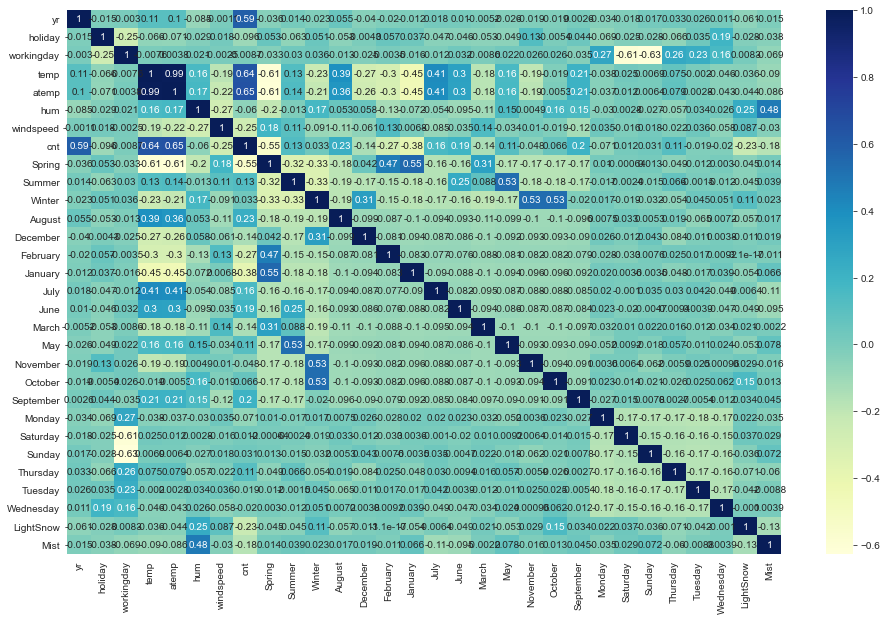

In [4311]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = ((16,10)))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Dividing into X and Y sets for the model building

In [4312]:
y_train = data_train.pop('cnt')
x_train = data_train

In [4313]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [4314]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# Building A Linear Model

In [4315]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# REF
   - REF stands for Recursive Feature Elimination
   - We will be using the Linear Regression function from Scikit Learn for its compatibility with RFE(Which is a utility from sklearn)

In [4316]:
# Using RFE approch for feature selection
# Running RFE with the output number of the variable equal to 15

LR = LinearRegression()
LR.fit(x_train, y_train)

R = RFE(LR, 15)
R = R.fit(x_train, y_train)

In [4317]:
# List of variable selected in top 15 list
list(zip(x_train.columns, R.support_, R.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 10),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 7),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('LightSnow', True, 1),
 ('Mist', True, 1)]

In [4318]:
# selecting the selected varible via RFE in colm list
colm = x_train.columns[R.support_]
colm

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'December', 'January', 'July', 'November', 'September',
       'LightSnow', 'Mist'],
      dtype='object')

In [4319]:
# Checking which columns has been rejected
x_train.columns[~R.support_]

Index(['workingday', 'atemp', 'August', 'February', 'June', 'March', 'May',
       'October', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

# Building a linear model

In [4320]:
# Building model using statsmodel
import statsmodels.api as sm

In [4321]:
x_train_R1 = sm.add_constant(x_train_R)
LR = sm.OLS(y_train, x_train_R1).fit()
print(LR.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.37e-186
Time:                        22:40:47   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1264      0.017      7.541      0.0

In [4322]:
# Generic function to calculate VIF of variables
def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [4323]:
# dataframe with RFE selected variables
x_train_R = x_train[colm]

In [4324]:
# Calculate
calculateVIF(x_train_R)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,Spring,4.37
7,Winter,4.06
6,Summer,2.81
14,Mist,2.32
0,yr,2.09
11,November,1.83
9,January,1.75


In [4325]:
# Column hum has a very high VIF so we drop it 
x_train_R = x_train_R.drop(['hum'], axis=1)

In [4326]:
# Building first linear regression model
x_train_R2 = sm.add_constant(x_train_R)
LR2 = sm.OLS(y_train, x_train_R2).fit()
print(LR2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.57e-186
Time:                        22:40:47   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [4327]:
calculateVIF(x_train_R)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,Winter,2.94
4,Spring,2.89
5,Summer,2.23
0,yr,2.07
10,November,1.80
8,January,1.66
9,July,1.59
13,Mist,1.56


In [4328]:
# November has A very high p-value which means it is insignificant so we drop it
x_train_R = x_train_R.drop(['November'],axis=1)

In [4329]:
x_train_R3 = sm.add_constant(x_train_R)
LR3= sm.OLS(y_train, x_train_R3).fit()
print(LR3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.20e-186
Time:                        22:40:47   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2288      0.031      7.334      0.0

In [4330]:
# December has A very high p-value which means it is insignificant so we drop it
x_train_R = x_train_R.drop(['December'],axis=1)

In [4331]:
x_train_R4 = sm.add_constant(x_train_R)
LR4= sm.OLS(y_train, x_train_R4).fit()
print(LR4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.97e-187
Time:                        22:40:47   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2155      0.030      7.096      0.0

In [4332]:
# January has A very high p-value which means it is insignificant so we drop it
x_train_R = x_train_R.drop(['January'],axis=1)

In [4333]:
x_train_R5 = sm.add_constant(x_train_R)
LR5= sm.OLS(y_train, x_train_R5).fit()
print(LR5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.40e-187
Time:                        22:40:47   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

In [4334]:
calculateVIF(x_train_R)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,Summer,2.21
4,Spring,2.08
0,yr,2.07
6,Winter,1.79
7,July,1.58
10,Mist,1.55
8,September,1.34
9,LightSnow,1.08


In [4335]:
# July has A very high p-value which means it is insignificant so we drop it
x_train_R = x_train_R.drop(['July'],axis=1)

In [4336]:
x_train_R6 = sm.add_constant(x_train_R)
LR6= sm.OLS(y_train, x_train_R6).fit()
print(LR6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          7.36e-187
Time:                        22:40:48   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.0

In [4337]:
# Spring has A very high p-value which means it is insignificant so we drop it
x_train_R = x_train_R.drop(['Spring'],axis=1)

In [4338]:
x_train_R7 = sm.add_constant(x_train_R)
LR7= sm.OLS(y_train, x_train_R7).fit()
print(LR7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.37e-186
Time:                        22:40:48   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1264      0.017      7.541      0.0

In [4339]:
calculateVIF(x_train_R)

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,Summer,1.56
8,Mist,1.48
5,Winter,1.38
6,September,1.20
7,LightSnow,1.08
1,holiday,1.03


#  Adding and checking if model improves

In [4340]:
# Adding June and checking if model improves

x_train_R['June'] = x_train['June']
x_train_R.head()

,yr,holiday,temp,windspeed,Summer,Winter,September,LightSnow,Mist,June
653,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,1,0


In [4341]:
x_train_R8 = sm.add_constant(x_train_R)
LR8 = sm.OLS(y_train, x_train_R8).fit()
print(LR8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.99e-185
Time:                        22:40:48   Log-Likelihood:                 491.78
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     499   BIC:                            -915.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1256      0.017      7.458      0.0

In [4342]:
calculateVIF(x_train_R)

,Features,VIF
2,temp,4.05
3,windspeed,3.08
0,yr,2.00
4,Summer,1.62
8,Mist,1.49
5,Winter,1.38
9,June,1.28
6,September,1.22
7,LightSnow,1.08
1,holiday,1.04


In [4343]:
# June has A very high p-value which means it is insignificant so we drop it
x_train_R = x_train_R.drop(['June'],axis=1)

In [4344]:
x_train_R9 = sm.add_constant(x_train_R)
LR9 = sm.OLS(y_train, x_train_R9).fit()
print(LR9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.37e-186
Time:                        22:40:49   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1264      0.017      7.541      0.0

In [4345]:
# Adding March and checking if model improves

x_train_R['March'] = x_train['March']
x_train_R.head()

,yr,holiday,temp,windspeed,Summer,Winter,September,LightSnow,Mist,March
653,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,1
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,1,0


In [4346]:
x_train_R10 = sm.add_constant(x_train_R)
LR10 = sm.OLS(y_train, x_train_R10).fit()
print(LR10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          7.64e-186
Time:                        22:40:49   Log-Likelihood:                 492.76
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     499   BIC:                            -916.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1209      0.017      7.054      0.0

In [4347]:
calculateVIF(x_train_R)

,Features,VIF
2,temp,3.70
3,windspeed,3.26
0,yr,2.01
4,Summer,1.56
8,Mist,1.48
5,Winter,1.41
6,September,1.21
9,March,1.18
7,LightSnow,1.08
1,holiday,1.04


In [4348]:
# March has A very high p-value which means it is insignificant so we drop it
x_train_R = x_train_R.drop(['March'],axis=1)

In [4349]:
x_train_R11 = sm.add_constant(x_train_R)
LR11 = sm.OLS(y_train, x_train_R11).fit()
print(LR11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.37e-186
Time:                        22:40:50   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1264      0.017      7.541      0.0

In [4350]:
calculateVIF(x_train_R)

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,Summer,1.56
8,Mist,1.48
5,Winter,1.38
6,September,1.20
7,LightSnow,1.08
1,holiday,1.03


In [4351]:
LR11.params

const        0.126436
yr           0.232786
holiday     -0.099211
temp         0.548046
windspeed   -0.153276
Summer       0.086848
Winter       0.130574
September    0.101076
LightSnow   -0.283837
Mist        -0.079747
dtype: float64

# Out all the models model LR21 seems to give goodresult so we choose it. 

# Residual Analysis

In [4352]:
x_train_R11

,const,yr,holiday,temp,windspeed,Summer,Winter,September,LightSnow,Mist
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,1
111,1.0,0,0,0.345824,0.380981,1,0,0,0,1
580,1.0,1,0,0.914852,0.462538,0,0,0,0,0
500,1.0,1,0,0.719639,0.172431,1,0,0,0,0
479,1.0,1,0,0.520271,0.164434,1,0,0,0,0
472,1.0,1,0,0.503656,0.270032,1,0,0,0,1


In [4353]:
y_train_predict = LR11.predict(x_train_R11)

In [4354]:
Res = y_train - y_train_predict

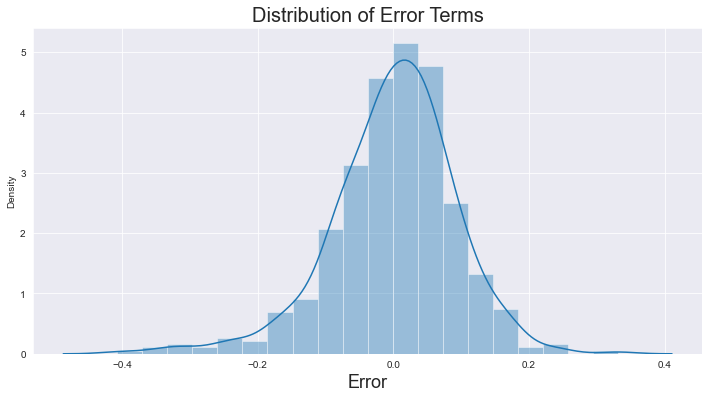

In [4355]:
# Ploting of Residuals
# Plot the histogram of the error terms
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.distplot((Res), bins=20)

# Plot heading
plt.title('Distribution of Error Terms', fontsize=20)

# Plot lablel
plt.xlabel('Error', fontsize=18)
plt.show()

# Multi Colinearity

In [4356]:
calculateVIF(x_train_R)

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,Summer,1.56
8,Mist,1.48
5,Winter,1.38
6,September,1.20
7,LightSnow,1.08
1,holiday,1.03


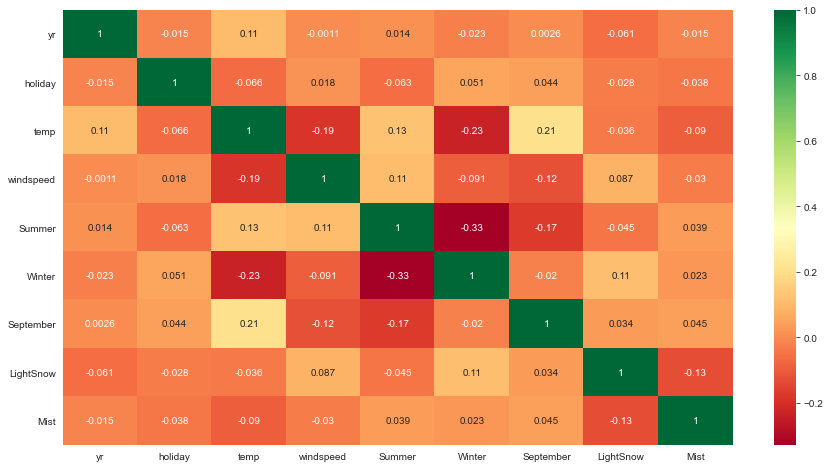

In [4357]:
plt.figure(figsize=(15,8))
sns.heatmap(x_train_R.corr(),annot = True, cmap="RdYlGn")
plt.show()

# Linearity

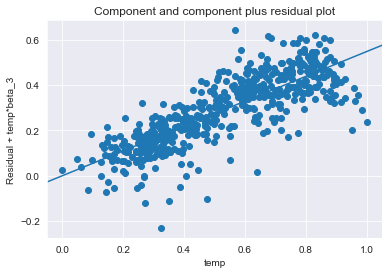

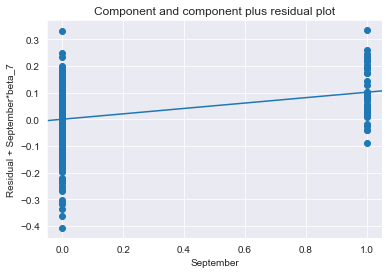

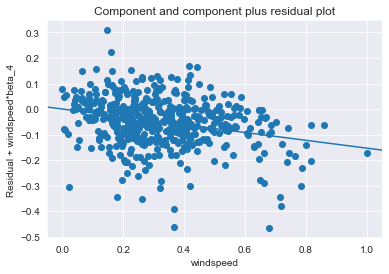

In [4358]:
# Linear relationship validation using CCPR plot
# Component and Component Plus Residual plot

sm.graphics.plot_ccpr(LR11, 'temp')
plt.show()

sm.graphics.plot_ccpr(LR11, 'September')
plt.show()

sm.graphics.plot_ccpr(LR11, 'windspeed')
plt.show()

# Homoscedasticity

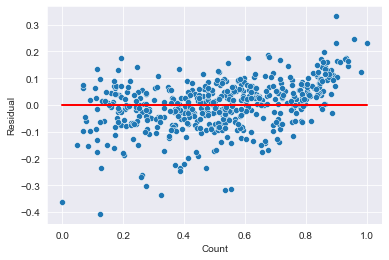

In [4359]:
y_train_pred = LR11.predict(x_train_R11)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

# Model Evaluation on Test Dataset

# Applying the MinMax scaling on the test sets

# Making Predictions Using the Final Model

In [4360]:
# Scaler variables in x_test 
data_vars = ['temp','atemp','hum','windspeed','cnt']

In [4361]:
# Test data to be transformed only, no fitting
data_test[data_vars] = scaler.transform(data_test[data_vars])
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [4362]:
data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4363]:
y_test = data_test.pop('cnt')
x_test = data_test

In [4364]:
x_train_R11.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Summer', 'Winter',
       'September', 'LightSnow', 'Mist'],
      dtype='object')

In [4365]:
colm1 = x_train_R.columns

x_test = x_test[colm1]

x_test_R11 = sm.add_constant(x_test)

In [4366]:
y_predict = LR11.predict(x_test_R11)

Text(0, 0.5, 'y_predict')

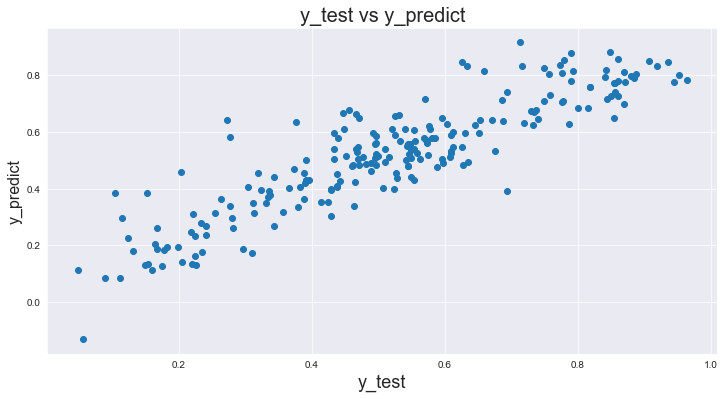

In [4367]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_predict)
plt.title('y_test vs y_predict', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_predict', fontsize=16)

In [4368]:
round(LR11.params, 4)

const        0.1264
yr           0.2328
holiday     -0.0992
temp         0.5480
windspeed   -0.1533
Summer       0.0868
Winter       0.1306
September    0.1011
LightSnow   -0.2838
Mist        -0.0797
dtype: float64

In [4369]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4370]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_predict))

0.09895583956046228

In [4371]:
# Calculate the R square for test

R_square = r2_score(y_test, y_predict)
R_square

0.7938290016640652

In [4372]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_R2 = round(1-(1-R_square)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_R2)

0.785


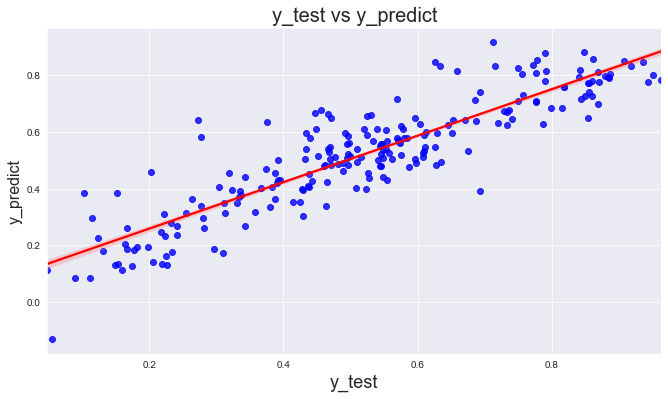

In [4373]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure(figsize=(11,6))
sns.regplot(x=y_test, y=y_predict, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_predict', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_predict', fontsize=16)
plt.show()

# comparision between Training and Testing dataset:
- Train dataset R^2  :  0.831
- Test dataset R^2   :  0.7938
- Train dataset Adjusted R^2  :  0.828
- Test dataset Adjusted R^2  :   0.785

In [4374]:
x_t = x_train_R.iloc[:,0].values

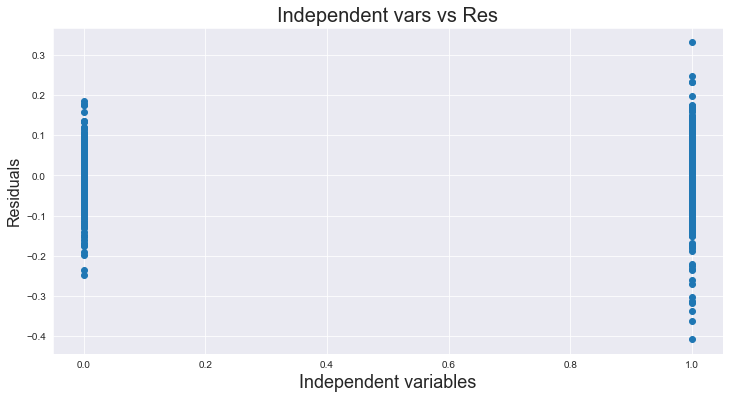

In [4375]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure(figsize=(12,6))
plt.scatter(x_t, Res)

# Plot heading
plt.title('Independent vars vs Res', fontsize=20)              # 

# Plot lablel
plt.xlabel('Independent variables', fontsize=18)                        
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [4376]:
x_train_R.head()

,yr,holiday,temp,windspeed,Summer,Winter,September,LightSnow,Mist
653,1,0,0.509887,0.300794,0,1,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1
728,1,0,0.245101,0.663106,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,1


In [4377]:
print(x_train_R11.columns)

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Summer', 'Winter',
       'September', 'LightSnow', 'Mist'],
      dtype='object')


In [4378]:
print(LR11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.37e-186
Time:                        22:40:57   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1264      0.017      7.541      0.0

# We can see that the equation for best fitted line is:




- cnt = 0.232*yr - 0.099*holiday + 0.548*temp - 0.153*windspeed + 0.086*Summer + 0.130*Winter + 0.101*September - 0.283*LightSnow - 0.079*Mist 

# We can see the demand for bikes depends mainly on below variables:

- yr , holiday, temp,  windspeed ,Summer, Winter, September, LightSnow, Mist  

- Demands increases if it is Summer, Winter, September, temp and yr

- Demands decreases if it is holiday, windspeed, LightSnow, Mist

 # Final recommendations for the company:
 
 - Demand if it is Summer, Winter, September, temp 